## Custom Optimizer

Stochastic Gradient Descent (SGD) Formula:

SGD updates the model parameters (θ) based on the gradient of the loss function (J(θ)) with respect to each parameter multiplied by a fixed learning rate (η).

Mathematically, the update rule for parameter θ at each iteration (t) is given by:

θ_{t+1} = θ_t - η ⋅ ∇J(θ_t)

where:
- θ_{t} represents the model parameters at iteration t.
- η is the learning rate.
- ∇J(θ_t) is the gradient of the loss function with respect to the parameters θ at iteration t.

Adaptive Moment Estimation (Adam) Formula:

Adam computes adaptive learning rates for each parameter by estimating the first moment (mean) and second moment (uncentered variance) of the gradients.

The update rule for parameter θ in Adam consists of three main steps:

1. Computing first and second moments of gradients:
    m_t = β_1 ⋅ m_{t-1} + (1 - β_1) ⋅ ∇J(θ_t)
    v_t = β_2 ⋅ v_{t-1} + (1 - β_2) ⋅ (∇J(θ_t))^2

2. Bias-corrected moments:
    𝜎 m_t = m_t / (1 - β_1^t)
    𝜎 v_t = v_t / (1 - β_2^t)

3. Updating parameters:
    θ_{t+1} = θ_t - η ⋅ 𝜎 m_t / (√𝜎 v_t + ε)

where:
- β_1 and β_2 are exponential decay rates for the moment estimates.
- ε is a small constant (usually 10^-8) added to avoid division by zero.
- m_t and v_t are the first and second moments of gradients respectively.
- 𝜎 m_t and 𝜎 v_t are bias-corrected estimates of the moments.
- η is the learning rate.


### SGD

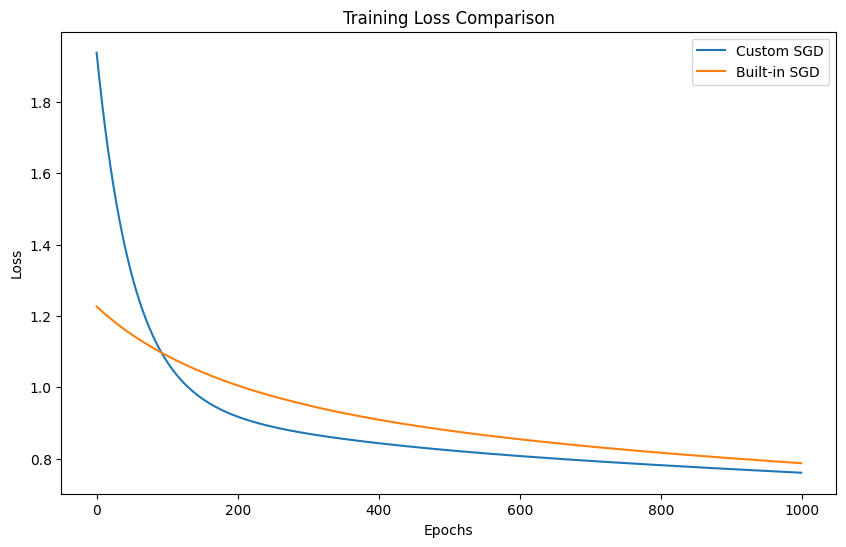

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Define the neural network model
class NeuralNetwork(tf.keras.Model):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = Dense(64, activation='relu')
        self.output_layer = Dense(1)

    def call(self, inputs):
        x = self.hidden_layer(inputs)
        return self.output_layer(x)

# Custom SGD optimization manually
class CustomSGDOptimizer:
    def __init__(self, learning_rate=0.001):
        self.learning_rate = learning_rate

    def apply_gradients(self, grads_and_vars):
        for (grad, var) in grads_and_vars:
            var.assign_sub(self.learning_rate * grad)

# Generate sample data
num_samples = 100
X_train = tf.random.normal(shape=(num_samples, 10))
y_train = tf.random.normal(shape=(num_samples, 1))

# Instantiate models
model_custom_sgd = NeuralNetwork()
model_builtin_sgd = NeuralNetwork()

# Initialize custom and built-in SGD optimizer
optimizer_custom_sgd = CustomSGDOptimizer(learning_rate=0.001)
optimizer_builtin_sgd = tf.keras.optimizers.SGD(learning_rate=0.001)

# Loss functions
loss_fn = tf.keras.losses.MeanSquaredError()

# Lists to store losses
losses_custom_sgd = []
losses_builtin_sgd = []

# Training loop for custom SGD
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = model_custom_sgd(X_train)
        loss = loss_fn(y_train, predictions)
    gradients = tape.gradient(loss, model_custom_sgd.trainable_variables)

    # Update the model's weights using the custom optimizer
    optimizer_custom_sgd.apply_gradients(zip(gradients, model_custom_sgd.trainable_variables))

    losses_custom_sgd.append(loss.numpy())

# Training loop for built-in SGD
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = model_builtin_sgd(X_train)
        loss = loss_fn(y_train, predictions)
    gradients = tape.gradient(loss, model_builtin_sgd.trainable_variables)

    # Update the model's weights using the built-in optimizer
    optimizer_builtin_sgd.apply_gradients(zip(gradients, model_builtin_sgd.trainable_variables))

    losses_builtin_sgd.append(loss.numpy())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(losses_custom_sgd, label='Custom SGD')
plt.plot(losses_builtin_sgd, label='Built-in SGD')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Adam

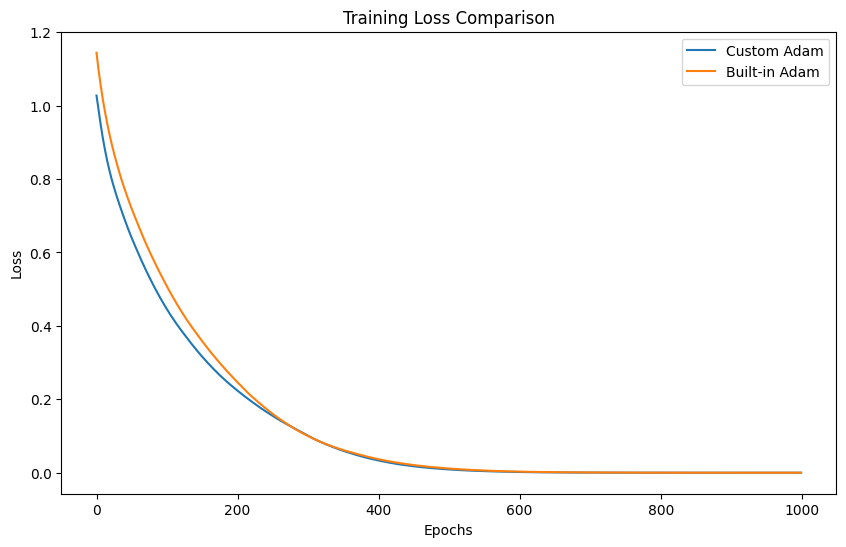

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Define the neural network model
class NeuralNetwork(tf.keras.Model):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = Dense(64, activation='relu')
        self.output_layer = Dense(1)

    def call(self, inputs):
        x = self.hidden_layer(inputs)
        return self.output_layer(x)

# Custom Adam optimization manually
class CustomAdamOptimizer:
    def __init__(self, learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7):
        self.learning_rate = learning_rate
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.epsilon = epsilon
        self.m = {}
        self.v = {}
        self.beta_1_t = beta_1
        self.beta_2_t = beta_2

    def apply_gradients(self, grads_and_vars):
        self.beta_1_t *= self.beta_1
        self.beta_2_t *= self.beta_2

        for (grad, var) in grads_and_vars:
            if var.ref() not in self.m:
                self.m[var.ref()] = tf.zeros_like(var)
                self.v[var.ref()] = tf.zeros_like(var)

            self.m[var.ref()] = self.beta_1 * self.m[var.ref()] + (1 - self.beta_1) * grad
            self.v[var.ref()] = self.beta_2 * self.v[var.ref()] + (1 - self.beta_2) * tf.square(grad)

            m_hat = self.m[var.ref()] / (1 - self.beta_1_t)
            v_hat = self.v[var.ref()] / (1 - self.beta_2_t)

            var.assign_sub(self.learning_rate * m_hat / (tf.sqrt(v_hat) + self.epsilon))

# Generate sample data
num_samples = 100
X_train = tf.random.normal(shape=(num_samples, 10))
y_train = tf.random.normal(shape=(num_samples, 1))

# Instantiate models
model_custom_adam = NeuralNetwork()
model_builtin_adam = NeuralNetwork()

# Initialize custom and built-in Adam optimizer
optimizer_custom_adam = CustomAdamOptimizer(learning_rate=0.001)
optimizer_builtin_adam = tf.keras.optimizers.Adam(learning_rate=0.001)

# Loss functions
loss_fn = tf.keras.losses.MeanSquaredError()

# Lists to store losses
losses_custom_adam = []
losses_builtin_adam = []

# Training loop for custom Adam
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = model_custom_adam(X_train)
        loss = loss_fn(y_train, predictions)
    gradients = tape.gradient(loss, model_custom_adam.trainable_variables)

    # Update the model's weights using the custom optimizer
    optimizer_custom_adam.apply_gradients(zip(gradients, model_custom_adam.trainable_variables))

    losses_custom_adam.append(loss.numpy())

# Training loop for built-in Adam
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = model_builtin_adam(X_train)
        loss = loss_fn(y_train, predictions)
    gradients = tape.gradient(loss, model_builtin_adam.trainable_variables)

    # Update the model's weights using the built-in optimizer
    optimizer_builtin_adam.apply_gradients(zip(gradients, model_builtin_adam.trainable_variables))

    losses_builtin_adam.append(loss.numpy())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(losses_custom_adam, label='Custom Adam')
plt.plot(losses_builtin_adam, label='Built-in Adam')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


1. This implementation maintains separate m and v parameters for each variable in the model, which might help in better handling gradients and optimization.

2. CustomAdamOptimizer implementation to use variable.ref() as keys in the m and v dictionaries:

## Fitting

### Early Stopping

Early stopping in neural networks helps prevent overfitting by monitoring the model's performance on a validation dataset. It stops training when the validation loss starts increasing, saving computational resources and determining the optimal number of epochs for training. This prevents the model from memorizing the training data and ensures it generalizes well to unseen data.

Epoch 688: early stopping


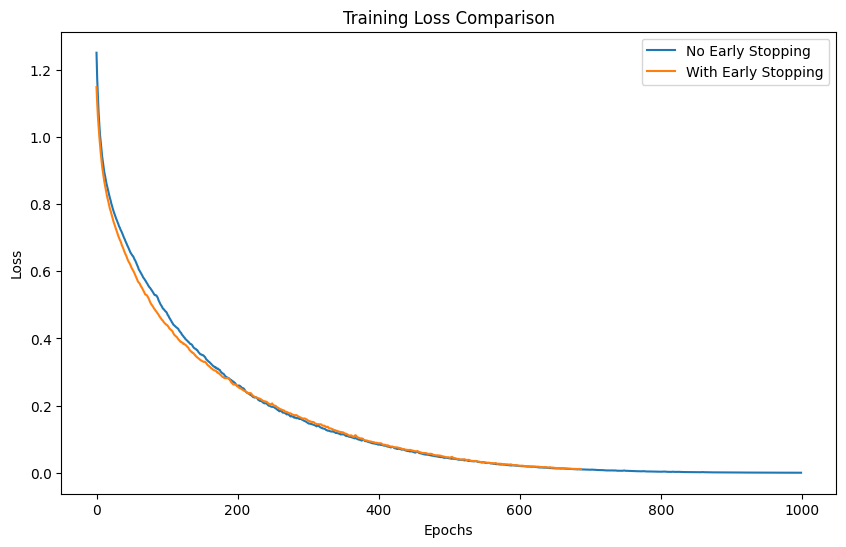

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Generate sample data
num_samples = 100
X_train = tf.random.normal(shape=(num_samples, 10))
y_train = tf.random.normal(shape=(num_samples, 1))

# Define the neural network model using Sequential API
model_builtin_adam_no_early_stopping = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(1)
])
model_builtin_adam_with_early_stopping = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(1)
])

# Compile the models with built-in Adam optimizer and MeanSquaredError loss
model_builtin_adam_no_early_stopping.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                                             loss=tf.keras.losses.MeanSquaredError())
model_builtin_adam_with_early_stopping.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                                               loss=tf.keras.losses.MeanSquaredError())

# Train the models
history_no_early_stopping = model_builtin_adam_no_early_stopping.fit(X_train, y_train, epochs=1000, verbose=0)
early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_with_early_stopping = model_builtin_adam_with_early_stopping.fit(X_train, y_train, epochs=1000, verbose=0, callbacks=[early_stopping])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(history_no_early_stopping.history['loss'], label='No Early Stopping')
plt.plot(history_with_early_stopping.history['loss'], label='With Early Stopping')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Dropout and Batch Normalization

**Dropout**: Dropout randomly sets a fraction of input units to zero during training, preventing overfitting by forcing the network to learn more robust features and reducing reliance on any single input. During inference, dropout is turned off.

**Batch Normalization**: Batch Normalization normalizes the activations of each layer by subtracting the batch mean and dividing by the batch standard deviation. This technique accelerates training, improves stability, and acts as a regularizer by reducing the internal covariate shift.

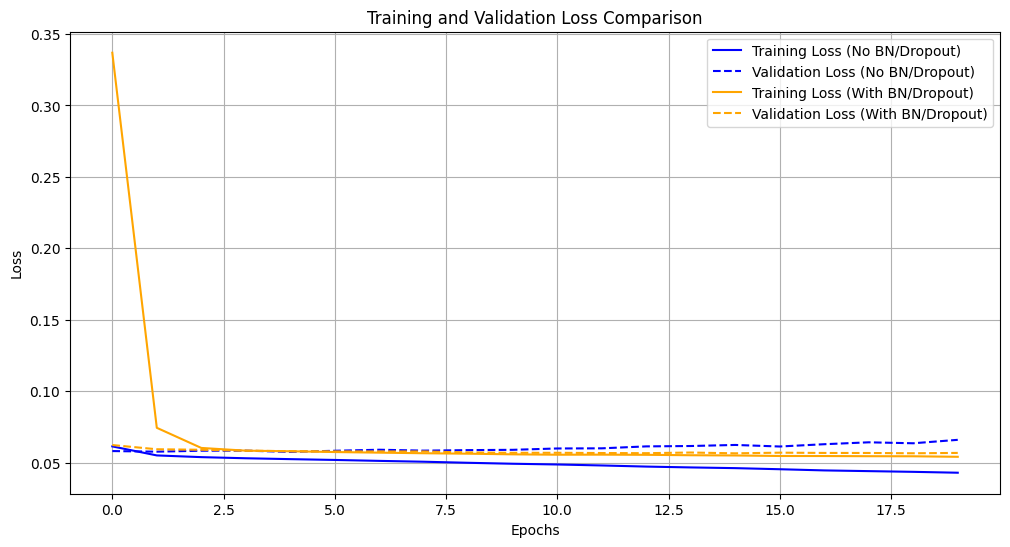

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

# Load the Spotify dataset
spotify = pd.read_csv('./spotify.csv')

# Data preprocessing
X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

# Split data into training and validation sets
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100
y_valid = y_valid / 100

# Define the neural network model without batch normalization and dropout
model_no_bn_dropout = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model with built-in Adam optimizer and MeanSquaredError loss
model_no_bn_dropout.compile(optimizer='adam',
                            loss='mean_squared_error')

# Train the model without batch normalization and dropout
history_no_bn_dropout = model_no_bn_dropout.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, verbose=0)

# Define the neural network model with batch normalization and dropout
model_with_bn_dropout = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1)
])

# Compile the model with built-in Adam optimizer and MeanSquaredError loss
model_with_bn_dropout.compile(optimizer='adam',
                              loss='mean_squared_error')

# Train the model with batch normalization and dropout
history_with_bn_dropout = model_with_bn_dropout.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, verbose=0)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(history_no_bn_dropout.history['loss'], label='Training Loss (No BN/Dropout)', color='blue')
plt.plot(history_no_bn_dropout.history['val_loss'], label='Validation Loss (No BN/Dropout)', linestyle='--', color='blue')
plt.plot(history_with_bn_dropout.history['loss'], label='Training Loss (With BN/Dropout)', color='orange')
plt.plot(history_with_bn_dropout.history['val_loss'], label='Validation Loss (With BN/Dropout)', linestyle='--', color='orange')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

The loss without batch normalization and dropout should indeed be greater, as batch normalization and dropout are techniques that help in regularizing and stabilizing the training process, thus reducing overfitting.

## Binary Classification

Epoch 1/100
175/175 [==============================] - 8s 30ms/step - loss: 0.4795 - binary_accuracy: 0.7732 - val_loss: 0.4407 - val_binary_accuracy: 0.7962
Epoch 2/100
175/175 [==============================] - 3s 20ms/step - loss: 0.4217 - binary_accuracy: 0.8034 - val_loss: 0.4076 - val_binary_accuracy: 0.8095
Epoch 3/100
175/175 [==============================] - 6s 32ms/step - loss: 0.4074 - binary_accuracy: 0.8098 - val_loss: 0.4015 - val_binary_accuracy: 0.8122
Epoch 4/100
175/175 [==============================] - 4s 20ms/step - loss: 0.3996 - binary_accuracy: 0.8139 - val_loss: 0.3982 - val_binary_accuracy: 0.8136
Epoch 5/100
175/175 [==============================] - 3s 18ms/step - loss: 0.3938 - binary_accuracy: 0.8174 - val_loss: 0.3945 - val_binary_accuracy: 0.8160
Epoch 6/100
175/175 [==============================] - 3s 17ms/step - loss: 0.3891 - binary_accuracy: 0.8195 - val_loss: 0.3922 - val_binary_accuracy: 0.8182
Epoch 7/100
175/175 [==============================]

<Axes: title={'center': 'Accuracy'}>

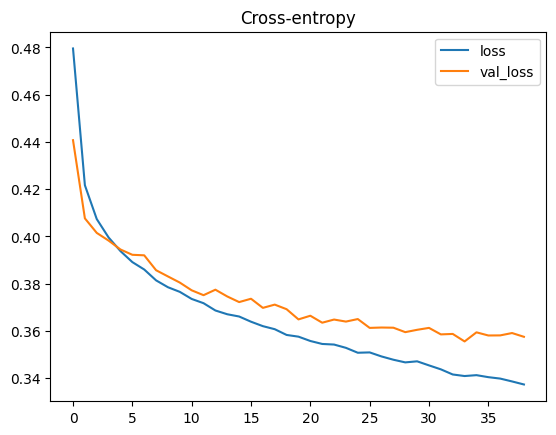

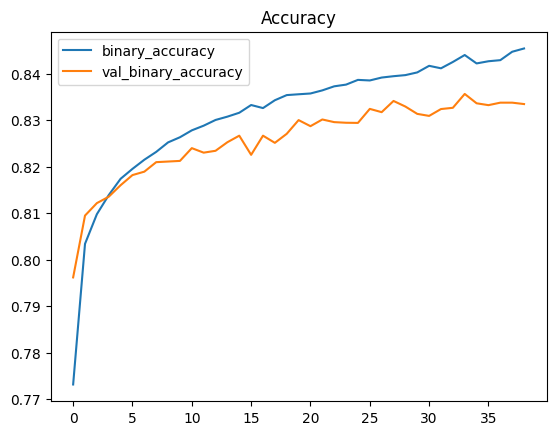

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset
hotel = pd.read_csv('./hotel.csv')

# Split features and target
X = hotel.copy()
y = X.pop('is_canceled')

# Preprocessing
X['arrival_date_month'] = X['arrival_date_month'].map({
    'January': 1, 'February': 2, 'March': 3,
    'April': 4, 'May': 5, 'June': 6, 'July': 7,
    'August': 8, 'September': 9, 'October': 10,
    'November': 11, 'December': 12
})

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"),
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

# Define the model
model = keras.Sequential([
    layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

# Define EarlyStopping callback
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=100,
    callbacks=[early_stopping],
)

# Plotting the training history
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")


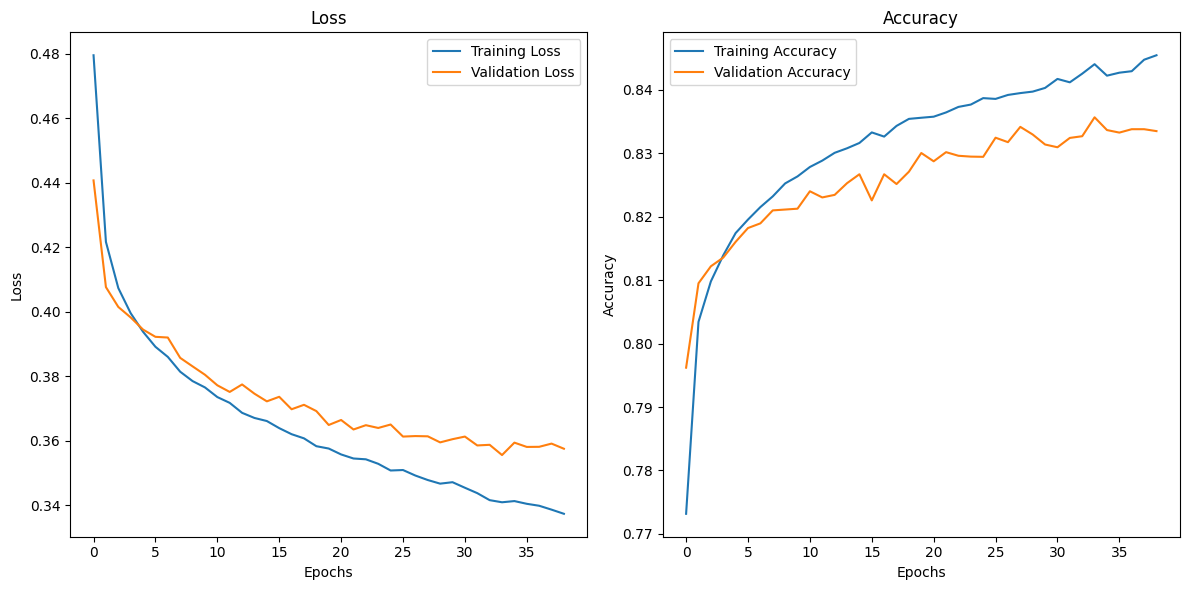

In [23]:
# Plotting the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['binary_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()